

> <strong>Neel Patel</strong>  

# CS494 - Colab 2
## PageRank

### Setup

If you executed the cells above, you should be able to see the dataset we will use for this Colab under the "Files" tab on the left panel.

Next, we import some of the common libraries needed for our task.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Loading

For this Colab we will be using [NetworkX](https://networkx.github.io), a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

The dataset we will analyze is a snapshot of the Web Graph centered around [stanford.edu](https://stanford.edu), collected in 2002. Nodes represent pages from Stanford University (stanford.edu) and directed edges represent hyperlinks between them. [[More Info]](http://snap.stanford.edu/data/web-Stanford.html)

### Your Task

To begin with, let's simplify our analysis by ignoring the dangling nodes and the disconnected components in the original graph.

Start by utilizing the Colaboratory setup for Problem Set 2 (PageRank) above. Now, rather than loading in the example graph dataset, you will need to generate a graph from
the above Kaggle dataset, possibly utilizing NetworkX package for this purpose.

• Consider a graph which is the final set of infected patients, where each node is a person and each link is a directed edge of infection passed from one person to another.

• Specifically, consider the PatientInfo.csv file and the column "infected_by" (the ID of who infected the patient).



In [ ]:
import csv
patient_id=[]
source_id=[]
patient_loc={}
with open('PatientInfo.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        patient_id.append(row["patient_id"])
        source_id.append(row["infected_by"])
        patient_loc[row["patient_id"]]=(row["city"],row["province"])
        line_count += 1
edge_list=[]
i=0
for src in source_id:
    if src !='':
        edge_list.append((src,patient_id[i]))
    i=i+1


In [ ]:
import networkx as nx
G=nx.Graph()
G.add_nodes_from(patient_id)
G.add_edges_from(edge_list)

Name: 
Type: Graph
Number of nodes: 3391
Number of edges: 816
Average degree:   0.4813


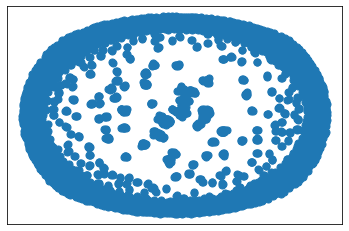

In [ ]:
print(nx.info(G))
color_map = []
nx.draw_networkx(G, arrows =True, with_labels = False, node_size = 50)

Compute the PageRank vector, using the default parameters in NetworkX: [https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pageranky](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

In [ ]:
pr=nx.pagerank(G)
print(pr)

{'1000000001': 0.00010692667656726156, '1000000002': 0.000712831277099987, '1000000003': 0.0018192632670894818, '1000000004': 0.00010692667656726156, '1000000005': 0.000712831277099987, '1000000006': 0.00041709168650042267, '1000000007': 0.00041709168650042267, '1000000008': 0.00010692667656726156, '1000000009': 0.00010692667656726156, '1000000010': 0.00041709168650042267, '1000000011': 0.00010692667656726156, '1000000012': 0.00010692667656726156, '1000000013': 0.000747814717598074, '1000000014': 0.0008084236451790139, '1000000015': 0.000550195698817457, '1000000016': 0.0007478147175980739, '1000000017': 0.0010540625902100713, '1000000018': 0.00010692667656726156, '1000000019': 0.0004499029981722126, '1000000020': 0.001038102433665047, '1000000021': 0.000808423645179014, '1000000022': 0.001038102433665047, '1000000023': 0.0012244629369780257, '1000000024': 0.00010692667656726156, '1000000025': 0.000550195698817457, '1000000026': 0.00010692667656726156, '1000000027': 0.00010692667656726

Select the top 5 infecters based on their PageRank score and briefly review their movements in the dataset.

In [ ]:
top5=np.array([(k,v) for k, v in sorted(pr.items(), key=lambda item: item[1],reverse=True)])[:5]
print("Top 5 in increasing order are:")
for item, value in top5:
  print('Patient Id: ',item,' PageRank: ', value)
top5_patient_id=[item[0] for item in top5] 

Top 5 in increasing order are:
Patient Id:  2000000205  PageRank:  0.016918076696893943
Patient Id:  4100000008  PageRank:  0.00860662405717921
Patient Id:  2000000167  PageRank:  0.008273563448601296
Patient Id:  2000000309  PageRank:  0.007174881621538462
Patient Id:  4100000006  PageRank:  0.006934023711218878


Follow each patients movements to see where they have been throughout their time having Corona Virus.

In [ ]:
patient_route_type=[]
with open('PatientRoute.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        if row["patient_id"] in top5_patient_id:
            patient_route_type.append((row["patient_id"],row["type"],row["city"],row["province"]))
        line_count += 1
    print(patient_route_type)

[('4100000006', 'etc', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000006', 'etc', 'Asan-si', 'Chungcheongnam-do'), ('4100000006', 'store', 'Asan-si', 'Chungcheongnam-do'), ('4100000006', 'etc', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000006', 'hospital', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000006', 'pharmacy', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000006', 'hospital', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000008', 'etc', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000008', 'etc', 'Seongnam-si', 'Gyeonggi-do'), ('4100000008', 'church', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000008', 'etc', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000008', 'restaurant', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000008', 'etc', 'Ansan-si', 'Gyeonggi-do'), ('4100000008', 'hospital', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000008', 'etc', 'Ansan-si', 'Gyeonggi-do'), ('4100000008', 'public_transportation', 'Cheonan-si', 'Chungcheongnam-do'), ('4100000008', 'etc', 'Cheonan-si', 'Chungcheong

In [ ]:
patient_route_type
patient_loc
for id in top5_patient_id:
    out_of_province_count=0
    out_of_city_count=0
    total_visits=0
    patient_visit_loc=[]
    for info in patient_route_type:
        if info[0]==id:
            total_visits=total_visits+1
            patient_visit_loc.append(info[1])
            if info[3]!=patient_loc[id][1]:
                out_of_province_count=out_of_province_count+1
            elif info[2]!=patient_loc[id][0]:
                out_of_city_count=out_of_city_count+1
            
    print("For patient id: "+ id + "\n Total number of visits are: " + str(total_visits) + "\n out of these visits " + str(out_of_province_count) +" visits are out of state and "+  str(out_of_city_count)    +" vists are out of city."+ "\n The different locations visited by the person are: ",set(patient_visit_loc))
        
    

For patient id: 2000000205
 Total number of visits are: 0
 out of these visits 0 visits are out of state and 0 vists are out of city.
 The different locations visited by the person are:  set()
For patient id: 4100000008
 Total number of visits are: 22
 out of these visits 3 visits are out of state and 0 vists are out of city.
 The different locations visited by the person are:  {'pharmacy', 'hospital', 'church', 'store', 'restaurant', 'public_transportation', 'etc'}
For patient id: 2000000167
 Total number of visits are: 0
 out of these visits 0 visits are out of state and 0 vists are out of city.
 The different locations visited by the person are:  set()
For patient id: 2000000309
 Total number of visits are: 0
 out of these visits 0 visits are out of state and 0 vists are out of city.
 The different locations visited by the person are:  set()
For patient id: 4100000006
 Total number of visits are: 7
 out of these visits 0 visits are out of state and 5 vists are out of city.
 The diff

Once you have working code for each cell above, **head over to Gradescope, read carefully the questions, and submit your solution for this Colab**!